
# Face Image Classification with SVM
A learning project that utilizes the Labeled Faces in the Wild Dataset. The dataset has 13,000 face images of over 5,000 well known individuals. The data is loaded from scikit learn.

In [1]:
from sklearn.datasets import fetch_lfw_people

# Assign data
data_face = fetch_lfw_people(min_faces_per_person=80)

Loading faces with a minimum of 80 sample is important because it ensures we have enough data for training. 

In [2]:
# Checking the data
X = data_face.data
Y = data_face.target

# Shape of Data
print('Input data size: ', X.shape)
print('Output data size: ', Y.shape)

# Data labels
print('Labels: ',data_face.target_names)

Input data size:  (1140, 2914)
Output data size:  (1140,)
Labels:  ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [3]:
# Check the distribution of the label for clarity
for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.')

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


The data distribution is not balanced. It is important to keep this face in mind when making decisions about the classification model.

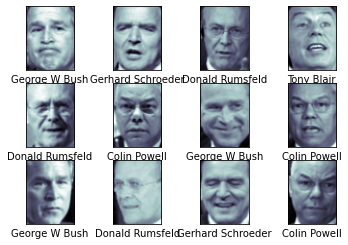

In [7]:
# Visualizing some of the images
import matplotlib.pyplot as plt

fig, ax =plt.subplots(3,4)

for i, axi in enumerate(ax.flat):
    axi.imshow(data_face.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=data_face.target_names[data_face.target[i]])
plt.show()


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Model Building
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

"""Number of dimensions is higher than the dimensions making it an ideal project for SVM. The key hyperparameters for tuning include
C, kernel and cross-validation to optimize rbf"""

# Model  Building
clf = SVC(class_weight='balanced', random_state=42) #class weight is balanced because the dataset is imbalanced.

parameters = {'C':[0.1, 1, 10],
            'gamma':[1e-07,1e-08,1e-06],
            'kernel':['rbf', 'linear']}

grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

# Fit to perform hyperparameter tuning
grid_search.fit(X_train, Y_train)

print('The Best Model: \n', grid_search.best_params_)

The Best Model: 
 {'C': 10, 'gamma': 1e-07, 'kernel': 'rbf'}


In [9]:
# Best Average Performance
print(' Best Mean Performance: ', grid_search.best_score_)

 Best Mean Performance:  0.8514619883040936


In [10]:
from sklearn.metrics import classification_report
# Use the best parameters for the model
clf_optimized = grid_search.best_estimator_
pred =  clf_optimized.predict(X_test)


# Accuracy and Classification Report
print(f'Accuracy: {clf_optimized.score(X_test, Y_test)*100:.1f}%')

print(classification_report(Y_test, pred, target_names=data_face.target_names))

Accuracy: 87.7%
                   precision    recall  f1-score   support

     Colin Powell       0.89      0.88      0.88        64
  Donald Rumsfeld       0.84      0.81      0.83        32
    George W Bush       0.88      0.93      0.90       127
Gerhard Schroeder       0.84      0.72      0.78        29
       Tony Blair       0.91      0.88      0.89        33

         accuracy                           0.88       285
        macro avg       0.87      0.84      0.86       285
     weighted avg       0.88      0.88      0.88       285



## Boosting Image Classification using PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pca = PCA(n_components=100, whiten=True, random_state=42)

svc = SVC(class_weight='balanced', kernel='rbf', random_state=42)

model = Pipeline([('pca',pca), ('svc',svc)])

pipeline_parameters = {'svc__C':[1,3,10],
                    'svc__gamma':[0.001,0.005]}

search_grid = GridSearchCV(model,pipeline_parameters)

search_grid.fit(X_train, Y_train)

best_model = search_grid.best_estimator_

pred = best_model.predict(X_test)


print('Best Model: ', search_grid.best_params_)

print('Best Mean Score: ', search_grid.best_score_)

print(f'Accuracy: {best_model.score(X_test, Y_test)*100:.1f}%')

print(classification_report(Y_test, pred, target_names=data_face.target_names))

Best Model:  {'svc__C': 1, 'svc__gamma': 0.005}
Best Mean Score:  0.8654970760233918
Accuracy: 90.2%
                   precision    recall  f1-score   support

     Colin Powell       0.91      0.95      0.93        64
  Donald Rumsfeld       0.77      0.84      0.81        32
    George W Bush       0.95      0.91      0.93       127
Gerhard Schroeder       0.81      0.86      0.83        29
       Tony Blair       0.93      0.85      0.89        33

         accuracy                           0.90       285
        macro avg       0.87      0.88      0.88       285
     weighted avg       0.90      0.90      0.90       285



The classification model improved from 87% to 90% after boosting using PCA. Dimensionality Reduction can significantly impact classification models if applied in line with the descriptive characteristics of the dataset.